# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import sys
print("Python %s" % sys.version)
import random, copy, time
from collections import namedtuple, deque

Python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [2]:
import numpy as np
print("NumPy %s" % np.__version__)

NumPy 1.16.5


In [3]:
import torch
print("PyTorch %s" % torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

PyTorch 1.2.0


In [4]:
import matplotlib
print("matplotlib %s" % matplotlib.__version__)
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline

matplotlib 3.1.1


In [5]:
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [6]:
env = UnityEnvironment(file_name='./Reacher_Linux_20_Agents/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [7]:
env

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [8]:
env.brain_names

['ReacherBrain']

In [9]:
env.brains

{'ReacherBrain': <unityagents.brain.BrainParameters at 0x7f847febdbe0>}

In [10]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [11]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
print('Type of each action:', brain.vector_action_space_type)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
Type of each action: continuous
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [12]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.12049999730661512


When finished, you can close the environment.

In [12]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Actor-Critic Models

In [12]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

In [13]:
class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, 
                 fc1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        # weight initialization gains 
        self.relu_gain = nn.init.calculate_gain('relu')
        self.tanh_gain = nn.init.calculate_gain('tanh')
        # layers
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.fc1.weight.data, self.relu_gain)
        #self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        nn.init.xavier_uniform_(self.fc2.weight.data, self.relu_gain)
        #self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        nn.init.xavier_uniform_(self.fc3.weight.data, self.tanh_gain)
        #self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = self.bn1(self.fc1(state)).relu()
        x = self.fc2(x).relu()
        return self.fc3(x).tanh()

In [14]:
class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, 
                 fcs1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        # weight initialization gains 
        self.relu_gain = nn.init.calculate_gain('relu')
        self.linear_gain = nn.init.calculate_gain('linear')
        # layers
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.bn1 = nn.BatchNorm1d(fcs1_units)
        
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.fcs1.weight.data, self.relu_gain)
        #self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        nn.init.xavier_uniform_(self.fc2.weight.data, self.relu_gain)
        #self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        nn.init.xavier_uniform_(self.fc3.weight.data, self.linear_gain)
        #self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = self.bn1(self.fcs1(state)).relu()
        x = torch.cat((xs, action), dim=1)
        x = self.fc2(x).relu()
        return self.fc3(x)

### Agent

In [15]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, device):
        """Initialize a ReplayBuffer object.
        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
            device (torch.device): - (type='cuda', index=0) for GPU 0
                                   - (type='cpu') for CPU
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", 
                                     field_names=["state", "action", "reward", 
                                                  "next_state", "done"])
        self.seed = random.seed(seed)
        self.device = device
    
    def add(self, states, actions, rewards, next_states, dones):
        """Add a new experience to memory."""
        for i in range(len(states)):
            e = self.experience(states[i], actions[i], rewards[i], 
                                next_states[i], dones[i])
            self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack(
            [e.state for e in experiences if e is not None]
        )).float().to(self.device)
        
        actions = torch.from_numpy(np.vstack(
            [e.action for e in experiences if e is not None]
        )).float().to(self.device)
        
        rewards = torch.from_numpy(np.vstack(
            [e.reward for e in experiences if e is not None]
        )).float().to(self.device)
        
        next_states = torch.from_numpy(np.vstack(
            [e.next_state for e in experiences if e is not None]
        )).float().to(self.device)
        
        dones = torch.from_numpy(np.vstack(
            [e.done for e in experiences if e is not None]
        ).astype(np.uint8)).float().to(self.device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [16]:
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + \
             self.sigma * np.array([random.random() for i in range(len(x))])
        self.state = x + dx
        return self.state

__Get Next State and Reward from Environment__ [1]
![actor-critic-algo1](./images/actor-critic-algo1.png)

__Update Critic__ [1]
![actor-critic-algo2](./images/actor-critic-algo2.png)

__Update Actor__ [1]
![actor-critic-algo3](./images/actor-critic-algo3.png)

In [17]:
class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed, device):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.device = device

        # Actor Network (w/ Target Network)
        self.actor_local = Actor(state_size, action_size, random_seed).to(self.device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(self.device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic(state_size, action_size, random_seed).to(self.device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(self.device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, 
                                           weight_decay=WEIGHT_DECAY)

        # Noise process
        #self.noise = OUNoise(action_size, random_seed)
        self.noise = OUNoise(action_size, random_seed, sigma=SIGMA)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed, 
                                   self.device)
    
    def step(self, states, actions, rewards, next_states, dones):
        """Save experience in replay memory, and use random sample from buffer to 
           learn."""
        # Save experience / reward
        self.memory.add(states, actions, rewards, next_states, dones)

    def sample_and_learn(self):
        # Learn, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE:
            for _ in range(10):
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(self.device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1.0, 1.0)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), 
                                             local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + \
                                    (1.0-tau)*target_param.data)

In [18]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("Use CUDA:",  use_cuda)

Use CUDA: True


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [20]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 128        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
# LR = 5e-4               # learning rate
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-3        # l earning rate of the critic
# UPDATE_EVERY = 4        # how often to update the network
WEIGHT_DECAY = 0        # L2 weight decay
SIGMA = 0.1             # standard deviation for noise

In [21]:
agent = Agent(state_size=state_size, action_size=action_size, 
              random_seed=2, device=device)

In [22]:
agent.actor_local

Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [23]:
agent.actor_target

Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [24]:
agent.actor_optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    weight_decay: 0
)

In [25]:
agent.critic_local

Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [26]:
agent.critic_target

Critic(
  (fcs1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=404, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [27]:
agent.critic_optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)

### Training

In [28]:
def ddpg(n_episodes=500, max_t=1000, print_every=10):
    acc_scores = []
    acc_scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        # reset the environment
        env_info = env.reset(train_mode=True)[brain_name]
        # get the current state (for each agent)
        states = env_info.vector_observations
        # reset agent
        agent.reset()
        # initialize the score (for each agent)
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states, add_noise=True)
            # send all actions to tne environment
            env_info = env.step(actions)[brain_name]
            # get next states, rewards and done flags (for each agent)
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            # agent steps
            agent.step(states, actions, rewards, next_states, dones)
            if t % 20 == 0:
                agent.sample_and_learn()
            states = next_states
            # accumulate rewards
            scores += rewards
            # exit loop if episode finished
            if np.any(dones):
                break

        # save most recent scores
        acc_scores.append(scores)
        acc_scores_window.append(scores)
        
        # model checkpoints
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, 
                                                           np.mean(acc_scores_window)), 
              end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, 
                                                               np.mean(acc_scores_window)))
        if np.mean(acc_scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
                  i_episode-100, np.mean(acc_scores_window)))
            break
            
    return acc_scores

tic = time.time()
scores = ddpg()
toc = time.time()
print("Runtime (in seconds) %d" % int(toc-tic))

Episode 10	Average Score: 0.84
Episode 20	Average Score: 1.37
Episode 30	Average Score: 0.97
Episode 40	Average Score: 0.73
Episode 50	Average Score: 0.59
Episode 60	Average Score: 0.49
Episode 70	Average Score: 0.42
Episode 80	Average Score: 0.37
Episode 90	Average Score: 0.37
Episode 100	Average Score: 0.36
Episode 110	Average Score: 0.33
Episode 120	Average Score: 0.23
Episode 130	Average Score: 0.32
Episode 140	Average Score: 0.43
Episode 150	Average Score: 0.55
Episode 160	Average Score: 0.68
Episode 170	Average Score: 0.89
Episode 180	Average Score: 1.13
Episode 190	Average Score: 1.46
Episode 200	Average Score: 1.85
Episode 210	Average Score: 2.41
Episode 220	Average Score: 3.51
Episode 230	Average Score: 5.27
Episode 240	Average Score: 7.58
Episode 250	Average Score: 10.67
Episode 260	Average Score: 14.25
Episode 270	Average Score: 17.65
Episode 280	Average Score: 20.99
Episode 290	Average Score: 24.46
Episode 300	Average Score: 27.84
Episode 307	Average Score: 30.00
Environmen

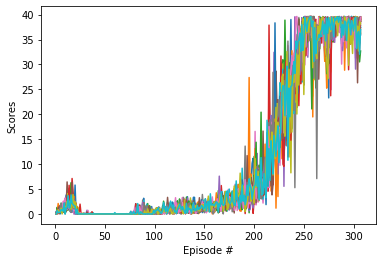

In [46]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')
plt.show()

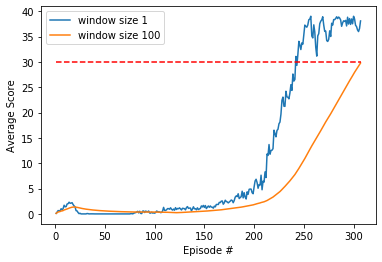

In [50]:
avg_scores = np.array(scores).mean(axis=1)
avg_scores_window = [np.mean(avg_scores[max(0,i-100):i+1]) 
                     for i in range(len(avg_scores))]

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), avg_scores, label="window size 1")
plt.plot(np.arange(1, len(scores)+1), avg_scores_window, label="window size 100")
plt.plot(np.arange(1, len(scores)+1), [30]*len(scores), 
         linestyle='--', color='red')
plt.ylabel('Average Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

```
while sleep 0.2; do
nvidia-smi --query-gpu=name,index,temperature.gpu,\
utilization.gpu,utilization.memory,\
memory.total,memory.free,memory.used --format=csv,noheader
done
```

Updating the actor and critic networks once at every timestep.
```
GeForce GTX 1060, 0, 75, 65 %, 43 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 75, 64 %, 43 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 75, 63 %, 43 %, 6078 MiB, 5142 MiB, 936 MiB
GeForce GTX 1060, 0, 75, 64 %, 42 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 75, 64 %, 43 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 76, 66 %, 43 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 76, 64 %, 42 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 76, 64 %, 43 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 76, 64 %, 43 %, 6078 MiB, 5143 MiB, 935 MiB
GeForce GTX 1060, 0, 76, 65 %, 44 %, 6078 MiB, 5143 MiB, 935 MiB
```

Updating the actor and critic networks 20 times at every timestep.
```
GeForce GTX 1060, 0, 95, 83 %, 56 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 82 %, 55 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 83 %, 55 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 83 %, 55 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 83 %, 57 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 82 %, 55 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 84 %, 54 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 82 %, 54 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 84 %, 57 %, 6078 MiB, 5164 MiB, 914 MiB
GeForce GTX 1060, 0, 95, 83 %, 55 %, 6078 MiB, 5164 MiB, 914 MiB
```

Updating the actor and critic networks 10 times at every 20 timesteps.
```
GeForce GTX 1060, 0, 68, 20 %, 4 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 14 %, 2 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 22 %, 4 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 21 %, 4 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 19 %, 3 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 15 %, 2 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 26 %, 4 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 20 %, 4 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 23 %, 4 %, 6078 MiB, 5182 MiB, 896 MiB
GeForce GTX 1060, 0, 68, 19 %, 3 %, 6078 MiB, 5182 MiB, 896 MiB
```

In [31]:
saved_model_actor = {'state_size': state_size,
                     'action_size': action_size,
                     'fc1_units': 400,
                     'fc2_units': 300,
                     'state_dict': agent.actor_local.state_dict()}

torch.save(saved_model_actor, './models/saved_model_actor.pth')

In [32]:
saved_model_critic = {'state_size': state_size,
                      'action_size': action_size,
                      'fcs1_units': 400,
                      'fc2_units': 300,
                      'state_dict': agent.critic_local.state_dict()}

torch.save(saved_model_critic, './models/saved_model_critic.pth')

In [35]:
env.close()

### Agent in Action

In [52]:
def load_saved_model_actor(filepath, device):
    saved_model = torch.load(filepath)
    actor = Actor(state_size=saved_model['state_size'], 
                  action_size=saved_model['action_size'], 
                  seed=2,
                  fc1_units=saved_model['fc1_units'],
                  fc2_units=saved_model['fc2_units']).to(device)
    actor.load_state_dict(saved_model['state_dict'])
    
    return actor

In [53]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("Use CUDA:",  use_cuda)

Use CUDA: True


In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [57]:
actor_local = load_saved_model_actor('./models/saved_model_actor.pth', device)
actor_local.eval()

Actor(
  (fc1): Linear(in_features=33, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=4, bias=True)
  (bn1): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [58]:
agent = Agent(state_size=state_size, action_size=action_size, 
              random_seed=2, device=device)

In [59]:
agent.actor_local = actor_local

In [65]:
env = UnityEnvironment(file_name='./Reacher_Linux_20_Agents/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [68]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states, add_noise=False)       # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 36.648499180842194


Record the action in mp4 format.

In [69]:
%%bash
ls -l ./results/mp4

total 1168
-rw-rw-r-- 1 eka eka 1194457 Oct 16 10:15 01.mp4


Convert the mp4 to GIF.

In [70]:
%%bash
ffmpeg -ss 2 -i ./results/mp4/01.mp4 -vf "fps=10,scale=640:-1:flags=lanczos,split[s0][s1];[s0]palettegen[p];[s1][p]paletteuse" ./results/gif/01.gif

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [71]:
env.close()

### Hardware Specifications and Software Versions

In [72]:
%%bash
cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.3 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.3 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [73]:
%%bash
nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [74]:
%%bash
nvidia-smi

Wed Oct 16 10:20:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1060    Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   56C    P5    16W /  N/A |    941MiB /  6078MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [75]:
%%bash
pip freeze

absl-py==0.8.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-project==0.8.3
asn1crypto==0.24.0
astor==0.7.1
astroid==2.2.5
astropy==3.2.1
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.7.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.8.0
bitarray==1.0.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.3.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.9.11
cffi==1.12.3
chardet==3.0.4
Click==7.0
cloudpickle==1.2.2
clyent==1.2.2
colorama==0.4.1
contextlib2==0.5.5
cryptography==2.7
cycler==0.10.0
Cython==0.29.13
cytoolz==0.10.0
dask==2.3.0
decorator==4.4.0
defusedxml==0.6.0
distributed==2.3.2
docopt==0.6.2
docutils==0.15.2
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.1.0
Flask==1.1.1
fsspec==0.4.0
gast==0.2.0
gevent==1.4.0
gmpy2==2.0.8
google-pasta==0.1.7
greenlet==0.4.15
grpcio==1.11.0
h5py==2.9.0
heapdict==1.0.0
html5lib==1.0.1
idna==2.8
imageio==2.5.0
imagesize==1.1.0
importlib-metadata==0.19
ipykernel==5.1.2
ipython==7.8.0
ipython-genutils==0.2.

### References

`[1]` Udacity. *Actor-Critic Methods*. Deep Reinforcement Learning for Enterprise Nanodegree Program, Part 3, Lesson 5. 2019.